In [1]:
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install xgboost
!pip install nltk


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# A very quick tutorial on machine learning 调库

scikit-learn is a Python module integrating classic machine learning algorithms in the tightly-knit world of scientific Python packages (NumPy, SciPy, matplotlib).
1. Often used as baseline for comparison with more powerful models.
2. Often used in real-world applications.

## 1. A simple Natural Language Processing (NLP) task: 20 Newsgroups classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
# load 20newsgroup dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# load the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')


In [15]:
# extract the data and the labels
X_train = newsgroups_train.data
y_train = newsgroups_train.target

X_test = newsgroups_test.data
y_test = newsgroups_test.target

# print the first document
print(X_train[0])
print(y_train[0])


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





7


Vectorization: from text to numerical features

In [16]:
# tokenize the documents


# fit TF-IDF vectorizer with Lemmatization
from sklearn.feature_extraction.text import TfidfVectorizer


# define the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# fit the vectorizer
vectorizer.fit(X_train)

TfidfVectorizer(stop_words='english')

In [17]:
# transform the training and test data
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# print the first document as a vector
print(X_train[0].shape)


(1, 129796)


In [60]:
# fit an adaboosted decision tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# fit the model
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200)
model.fit(X_train, y_train)

# predict the labels
y_pred = model.predict(X_test)

# compute the accuracy
print(accuracy_score(y_test, y_pred))

0.4972118959107807


In [61]:
# fit an SVM (will be introduced in the following lectures)
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8349707912904939


In [ ]:
%reset -f

## 2. A very very simple Vision task: MNIST digit classification

In [ ]:
# ML(DL) researchers use this every day
!pip install torch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# load mnist
import torch
import torchvision
import torchvision.transforms as transforms


# load the dataset 
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# extract the data and the labels to numpy arrays
X_train = trainset.data.numpy().reshape(-1, 28*28)
y_train = trainset.targets.numpy()

X_test = testset.data.numpy().reshape(-1, 28*28)
y_test = testset.targets.numpy()

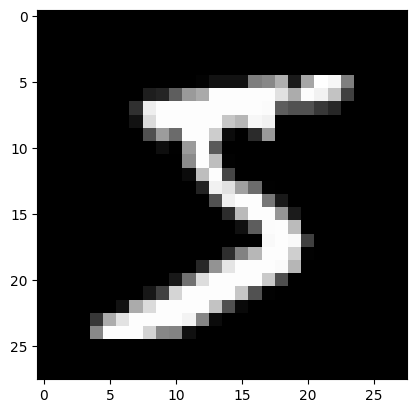

In [2]:
# show the first image
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.show()

In [4]:
# fit MNIST on a simple logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [45]:

model = LogisticRegression(penalty=None, max_iter=20)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9141


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


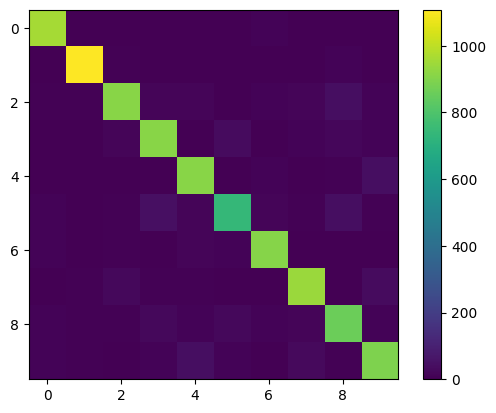

In [46]:
# plot the confusion matrix (Ground truth vs. Predicted)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.colorbar()
plt.show()

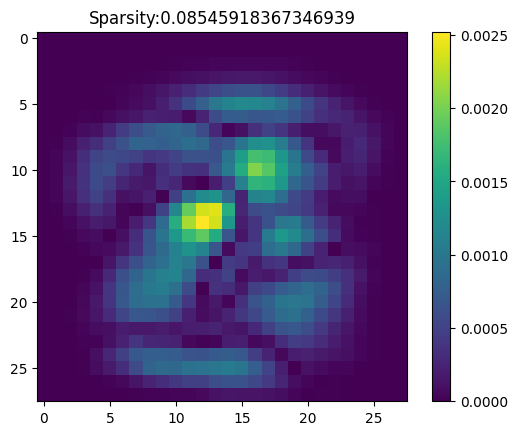

In [48]:
# plot the weight for 7
plt.imshow(np.abs(model.coef_[7].reshape(28, 28)))
plt.title(f'Sparsity:{np.mean(model.coef_[7] == 0)}')
plt.colorbar()
plt.show()


In [50]:
# now let's try on a l1-regularized logistic regression. The l1 penalty induces sparsity in the weights, which further brings interpretability from the feature selection perspective.
model = LogisticRegression(max_iter=10, penalty='l1', solver='saga', C=0.01)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9264


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


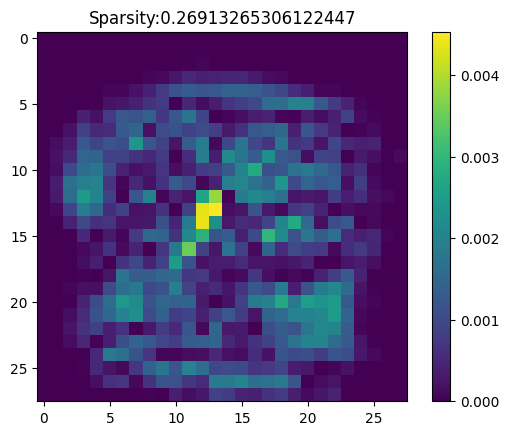

In [51]:
# plot the weight for 7
plt.imshow(np.abs(model.coef_[7].reshape(28, 28)))
plt.title(f'Sparsity:{np.mean(model.coef_[7] == 0)}')
plt.colorbar()
plt.show()

## 3. Let's play with other datasets

You can find more datasets at http://scikit-learn.org/stable/datasets/, UCI Machine Learning Repository https://archive.ics.uci.edu/, Kaggle, etc.

In [53]:
train = np.loadtxt('dota2Train.csv', delimiter=',')
test = np.loadtxt('dota2Test.csv', delimiter=',')

X_train = train[:, 1:]
y_train = train[:, 0]

X_test = test[:, 1:]
y_test = test[:, 0]

In [56]:
model = LogisticRegression(penalty=None, max_iter=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5967553914901884


c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
